We will be u using Logistic regression, Decision tree, SVM, K-Nearest Neighbors algorithm to train and predict the data and using ROC corve and test error rate to test which model perform the best.  

Import the library

In [2]:
# import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN

Data definition :
1. index - Unique Identifier for each row
2. trans_date_trans_time - Transaction DateTime
3. cc_num - Credit Card Number of Customer
4. merchant - Merchant Name
5. category - Category of Merchant
6. amt - Amount of Transaction
7. first - First Name of Credit Card Holder
8. last - Last Name of Credit Card Holder
9. gender - Gender of Credit Card Holder
10. street - Street Address of Credit Card Holder
11. city - City of Credit Card Holder
12. state - State of Credit Card Holder
13. zip - Zip of Credit Card Holder
14. lat - Latitude Location of Credit Card Holder
15. long - Longitude Location of Credit Card Holder
16. city_pop - Credit Card Holder's City Population
17. job - Job of Credit Card Holder
18. dob - Date of Birth of Credit Card Holder
19. trans_num - Transaction Number
20. unix_time - UNIX Time of transaction
21. merch_lat - Latitude Location of Merchant
22. merch_long - Longitude Location of Merchant
23. is_fraud - Fraud Flag <--- Target Class


Import the data

In [3]:
train_df = pd.read_csv("D:\SW\self-learning\Python\Python-Projects/fraudTrain.csv")
test_df = pd.read_csv("D:\SW\self-learning\Python\Python-Projects/fraudTest.csv")

train_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\54088\AppData\Local\Temp\ipykernel_12068\2810817820.py:1: SyntaxWarning: invalid escape sequence '\S'
  train_df = pd.read_csv("D:\SW\self-learning\Python\Python-Projects/fraudTrain.csv")
C:\Users\54088\AppData\Local\Temp\ipykernel_12068\2810817820.py:2: SyntaxWarning: invalid escape sequence '\S'
  test_df = pd.read_csv("D:\SW\self-learning\Python\Python-Projects/fraudTest.csv")


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Remove some of the coulumns that we don't need. including Unnamed:0, cc_num, category, first, last, street, zip, dob, lat, trans_num. 

In [4]:
train_df.drop(["trans_date_trans_time", "Unnamed: 0", "cc_num", "category", "city", "first", "last", "street", "zip", "dob", "lat", "trans_num"], axis = 1, inplace = True)
test_df.drop(["trans_date_trans_time", "Unnamed: 0", "cc_num", "category", "city", "first", "last", "street", "zip", "dob", "lat", "trans_num"], axis = 1, inplace = True)

train_df.dropna()
test_df.dropna()

,merchant,amt,gender,state,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,2.86,M,SC,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,29.84,F,UT,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",41.28,F,NY,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,60.05,M,FL,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,3.19,M,MI,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,43.77,M,MO,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,111.84,M,TX,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,86.88,F,WA,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,7.99,M,ID,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [5]:
le = LabelEncoder()
train_df["merchant"] = le.fit_transform(train_df["merchant"])
train_df["gender"] = le.fit_transform(train_df["gender"])
train_df["state"] = le.fit_transform(train_df["state"])
train_df["job"] = le.fit_transform(train_df["job"])

test_df["merchant"] = le.fit_transform(test_df["merchant"])
test_df["gender"] = le.fit_transform(test_df["gender"])
test_df["state"] = le.fit_transform(test_df["state"])
test_df["job"] = le.fit_transform(test_df["job"])

Train Data pie plot 

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


<Axes: ylabel='Type'>

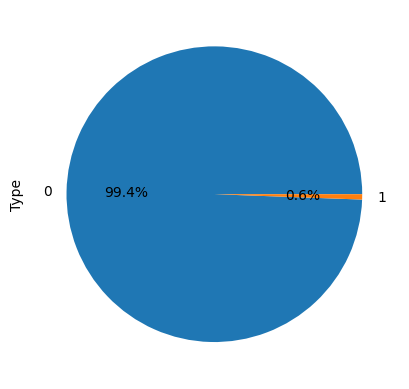

In [6]:
train_is_fraud = train_df[train_df["is_fraud"] == 1]
train_not_fraud = train_df[train_df["is_fraud"] == 0]

print(train_df["is_fraud"].value_counts())

train_df.groupby('is_fraud').size().plot(kind = "pie", 
                                         y = "is_fraud", 
                                         label = "Type", 
                                         autopct = '%1.1f%%')


Test Data pie plot

is_fraud
0    553574
1      2145
Name: count, dtype: int64


<Axes: ylabel='Type'>

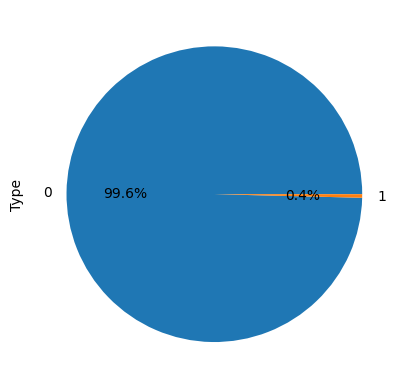

In [7]:
test_is_fraud = test_df[test_df["is_fraud"] == 1]
test_not_fraud = test_df[test_df["is_fraud"] == 0]

print(test_df["is_fraud"].value_counts())

test_df.groupby('is_fraud').size().plot(kind = "pie", 
                                         y = "is_fraud", 
                                         label = "Type", 
                                         autopct = '%1.1f%%')

Resampling training data to 1:1

is_fraud
0    7506
1    7506
Name: count, dtype: int64


<Axes: ylabel='Type'>

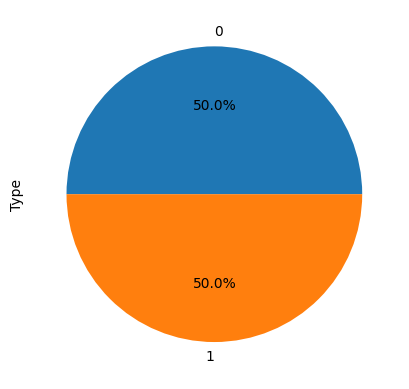

In [8]:
from sklearn.utils import resample
train_not_fraud_downsample_1 = resample(train_not_fraud, 
                               replace = True, 
                               n_samples = len(train_is_fraud), 
                               random_state = 42)

balanced_train_df_1 = pd.concat([train_not_fraud_downsample_1, train_is_fraud])

print(balanced_train_df_1["is_fraud"].value_counts())

balanced_train_df_1.groupby('is_fraud').size().plot(kind = "pie", 
                                         y = "is_fraud", 
                                         label = "Type", 
                                         autopct = '%1.1f%%')

Resampling testing data

is_fraud
0    2145
1    2145
Name: count, dtype: int64


<Axes: ylabel='Type'>

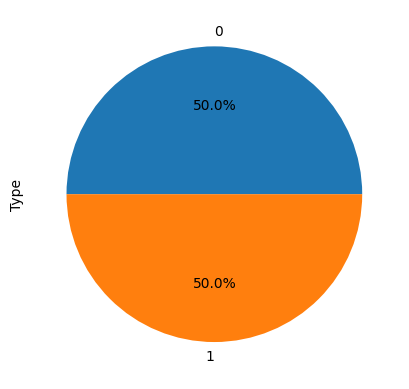

In [9]:
test_not_fraud_downsample_1 = resample(test_not_fraud, 
                               replace = True, 
                               n_samples = len(test_is_fraud), 
                               random_state = 42)

balanced_test_df_1 = pd.concat([test_not_fraud_downsample_1, test_is_fraud])

print(balanced_test_df_1["is_fraud"].value_counts())

balanced_test_df_1.groupby('is_fraud').size().plot(kind = "pie", 
                                         y = "is_fraud", 
                                         label = "Type", 
                                         autopct = '%1.1f%%')

Use Lda to select the feature again

In [10]:
train_x = balanced_train_df_1.drop(["is_fraud"], axis = 1)
train_y = balanced_train_df_1["is_fraud"]

test_x = balanced_test_df_1.drop(["is_fraud"], axis = 1)
test_y = balanced_test_df_1["is_fraud"]

In [11]:
sc = StandardScaler()
sc_X_train = sc.fit_transform(train_x)
sc_X_test = sc.transform(test_x)

lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(sc_X_train, train_y)
X_test_lda = lda.transform(sc_X_test)

Logistic Regression Model

Accuracy of logistic regression classifier on test set: 0.85897
Confusion matrix:
[[2090   55]
 [ 550 1595]]
ROC-AUC score:
0.8589743589743589


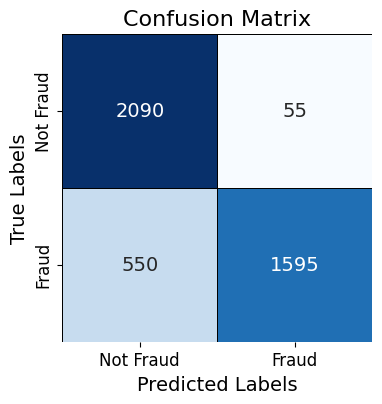

In [12]:
# Build the Logistic Regression model
logreg = LogisticRegression()

# Fit the data
logreg.fit(sc_X_train, train_y)

# Predict
y_pred = logreg.predict(sc_X_test)
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

SVM (Support Vector Machine) model

Accuracy of Support Vector classifier on test set: 0.85828
Confusion matrix:
[[2070   75]
 [ 533 1612]]
ROC-AUC score:
0.8582750582750582


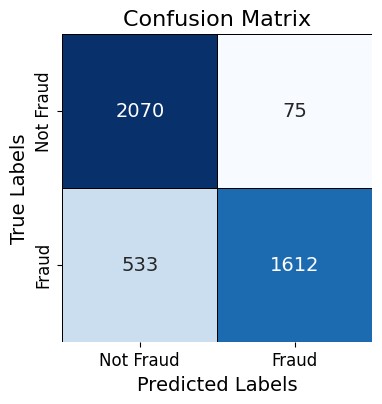

In [32]:
# Support Vector Classification model
svm = SVC(kernel='linear', gamma = 0.01, C = 1)

# Fit the data 
svm.fit(sc_X_train, train_y)

# Predict
y_pred = svm.predict(sc_X_test)
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of Support Vector classifier on test set: {:.5f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

Decision Tree model

Accuracy of random forest classifier on test set: 0.87436
Confusion matrix:
[[1732  413]
 [ 126 2019]]
ROC-AUC score:
0.8743589743589744


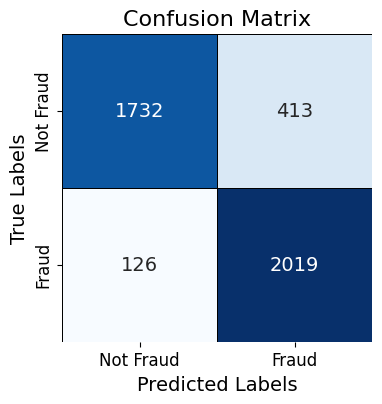

In [15]:
# Decision Tree model
dt = tree.DecisionTreeClassifier(criterion = 'gini', 
                                 max_depth = 3, 
                                 min_samples_leaf = 2,
                                 min_samples_split = 2)

# Fit the data 
dt.fit(sc_X_train, train_y)

# Predict
y_pred = dt.predict(sc_X_test)
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of random forest classifier on test set: {:.5f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

K-Nearest Neighbors model

Accuracy of random forest classifier on test set: 0.75058
Confusion matrix:
[[2079   66]
 [1004 1141]]
ROC-AUC score:
0.7505827505827507


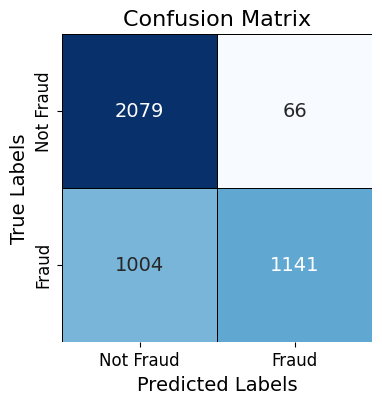

In [16]:
# KNN model
knn = KNN(n_neighbors = 48)

# Fit the data 
knn.fit(sc_X_train, train_y)

# Predict
y_pred = knn.predict(sc_X_test)
accuracy = accuracy_score(test_y, y_pred)
conf_matrix = confusion_matrix(test_y, y_pred)
auc_roc = roc_auc_score(test_y, y_pred)

# Print the result
print('Accuracy of random forest classifier on test set: {:.5f}'.format(accuracy))
print('Confusion matrix:')
print(conf_matrix)
print('ROC-AUC score:')
print(auc_roc)

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()